## In this notebook, we will process and clean the raw data that is provided to train the model.

* To begine with, first lets load the data and display the first few lines to know what we are working with.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = 'C:/Users/ok/Desktop/kaggel_titanic_project/Kaggle_titanic/Data/train.csv'
data = pd.read_csv(file_path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
clean_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* From the above cell, we  can see that most of the columons have data in them (are not empty). But we can see that the cabin has the most Nan values(more than half). And the age columon also has the second most highest Nan values.

* Hence since the cabin columon has more than 20% NaN value, i have decided to drop the cabin columon from the data, and impend the value for the age Nan values. And alos to for the two rows which has aNan value for the Embark columon

In [11]:
#First lets drop the cabin column
clean_data = data.drop('Cabin', axis='columns')

In [20]:
imputed_data

NameError: name 'imputed_data' is not defined

In [17]:
# Now lets fill in the Nan values of the age by imputation
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_data = pd.DataFrame(my_imputer.fit_transform(clean_data['Age']))
imputed_data.columns = clean_data.columns
#clean_data['Age'].fillna(int(clean_data['Age'].mean()), inplace=True)

ValueError: Expected 2D array, got 1D array instead:
array=[22.   38.   26.   35.   35.   54.    2.   27.   14.    4.   58.   20.
 39.   14.   55.    2.   31.   35.   34.   15.   28.    8.   38.   19.
 40.   66.   28.   42.   21.   18.   14.   40.   27.    3.   19.   18.
  7.   21.   49.   29.   65.   21.   28.5   5.   11.   22.   45.    4.
 29.   19.   17.   26.   32.   16.   21.   26.   32.   25.    0.83 30.
 22.   29.   28.   17.   33.   16.   23.   24.   29.   20.   46.   26.
 59.   71.   23.   34.   34.   28.   21.   33.   37.   28.   21.   38.
 47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.   21.   32.5
 32.5  54.   12.   24.   45.   33.   20.   47.   29.   25.   23.   19.
 37.   16.   24.   22.   24.   19.   18.   19.   27.    9.   36.5  42.
 51.   22.   55.5  40.5  51.   16.   30.   44.   40.   26.   17.    1.
  9.   45.   28.   61.    4.    1.   21.   56.   18.   50.   30.   36.
  9.    1.    4.   45.   40.   36.   32.   19.   19.    3.   44.   58.
 42.   24.   28.   34.   45.5  18.    2.   32.   26.   16.   40.   24.
 35.   22.   30.   31.   27.   42.   32.   30.   16.   27.   51.   38.
 22.   19.   20.5  18.   35.   29.   59.    5.   24.   44.    8.   19.
 33.   29.   22.   30.   44.   25.   24.   37.   54.   29.   62.   30.
 41.   29.   30.   35.   50.    3.   52.   40.   36.   16.   25.   58.
 35.   25.   41.   37.   63.   45.    7.   35.   65.   28.   16.   19.
 33.   30.   22.   42.   22.   26.   19.   36.   24.   24.   23.5   2.
 50.   19.    0.92 17.   30.   30.   24.   18.   26.   28.   43.   26.
 24.   54.   31.   40.   22.   27.   30.   22.   36.   61.   36.   31.
 16.   45.5  38.   16.   29.   41.   45.   45.    2.   24.   28.   25.
 36.   24.   40.    3.   42.   23.   15.   25.   28.   22.   38.   40.
 29.   45.   35.   30.   60.   24.   25.   18.   19.   22.    3.   22.
 27.   20.   19.   42.    1.   32.   35.   18.    1.   36.   17.   36.
 21.   28.   23.   24.   22.   31.   46.   23.   28.   39.   26.   21.
 28.   20.   34.   51.    3.   21.   33.   44.   34.   18.   30.   10.
 21.   29.   28.   18.   28.   19.   32.   28.   42.   17.   50.   14.
 21.   24.   64.   31.   45.   20.   25.   28.    4.   13.   34.    5.
 52.   36.   30.   49.   29.   65.   50.   48.   34.   47.   48.   38.
 56.    0.75 38.   33.   23.   22.   34.   29.   22.    2.    9.   50.
 63.   25.   35.   58.   30.    9.   21.   55.   71.   21.   54.   25.
 24.   17.   21.   37.   16.   18.   33.   28.   26.   29.   36.   54.
 24.   47.   34.   36.   32.   30.   22.   44.   40.5  50.   39.   23.
  2.   17.   30.    7.   45.   30.   22.   36.    9.   11.   32.   50.
 64.   19.   33.    8.   17.   27.   22.   22.   62.   48.   39.   36.
 40.   28.   24.   19.   29.   32.   62.   53.   36.   16.   19.   34.
 39.   32.   25.   39.   54.   36.   18.   47.   60.   22.   35.   52.
 47.   37.   36.   49.   49.   24.   44.   35.   36.   30.   27.   22.
 40.   39.   35.   24.   34.   26.    4.   26.   27.   42.   20.   21.
 21.   61.   57.   21.   26.   80.   51.   32.    9.   28.   32.   31.
 41.   20.   24.    2.    0.75 48.   19.   56.   23.   18.   21.   18.
 24.   32.   23.   58.   50.   40.   47.   36.   20.   32.   25.   43.
 40.   31.   70.   31.   18.   24.5  18.   43.   36.   27.   20.   14.
 60.   25.   14.   19.   18.   15.   31.    4.   25.   60.   52.   44.
 49.   42.   18.   35.   18.   25.   26.   39.   45.   42.   22.   24.
 48.   29.   52.   19.   38.   27.   33.    6.   17.   34.   50.   27.
 20.   30.   25.   25.   29.   11.   23.   23.   28.5  48.   35.   36.
 21.   24.   31.   70.   16.   30.   19.   31.    4.    6.   33.   23.
 48.    0.67 28.   18.   34.   33.   41.   20.   36.   16.   51.   30.5
 32.   24.   48.   57.   54.   18.    5.   43.   13.   17.   29.   25.
 25.   18.    8.    1.   46.   16.   25.   39.   49.   31.   30.   30.
 34.   31.   11.    0.42 27.   31.   39.   18.   39.   33.   26.   39.
 35.    6.   30.5  23.   31.   43.   10.   52.   27.   38.   27.    2.
  1.   15.    0.83 23.   18.   39.   21.   32.   20.   16.   30.   34.5
 17.   42.   35.   28.    4.   74.    9.   16.   44.   18.   45.   51.
 24.   41.   21.   48.   24.   42.   27.   31.    4.   26.   47.   33.
 47.   28.   15.   20.   19.   56.   25.   33.   22.   28.   25.   39.
 27.   19.   26.   32.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
clean_data.Age.shape

(712,)

In [15]:
#Finally lets drop the rows with the missing values
clean_data = clean_data.dropna()

In [8]:
clean_data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

<Axes: xlabel='Fare', ylabel='Count'>

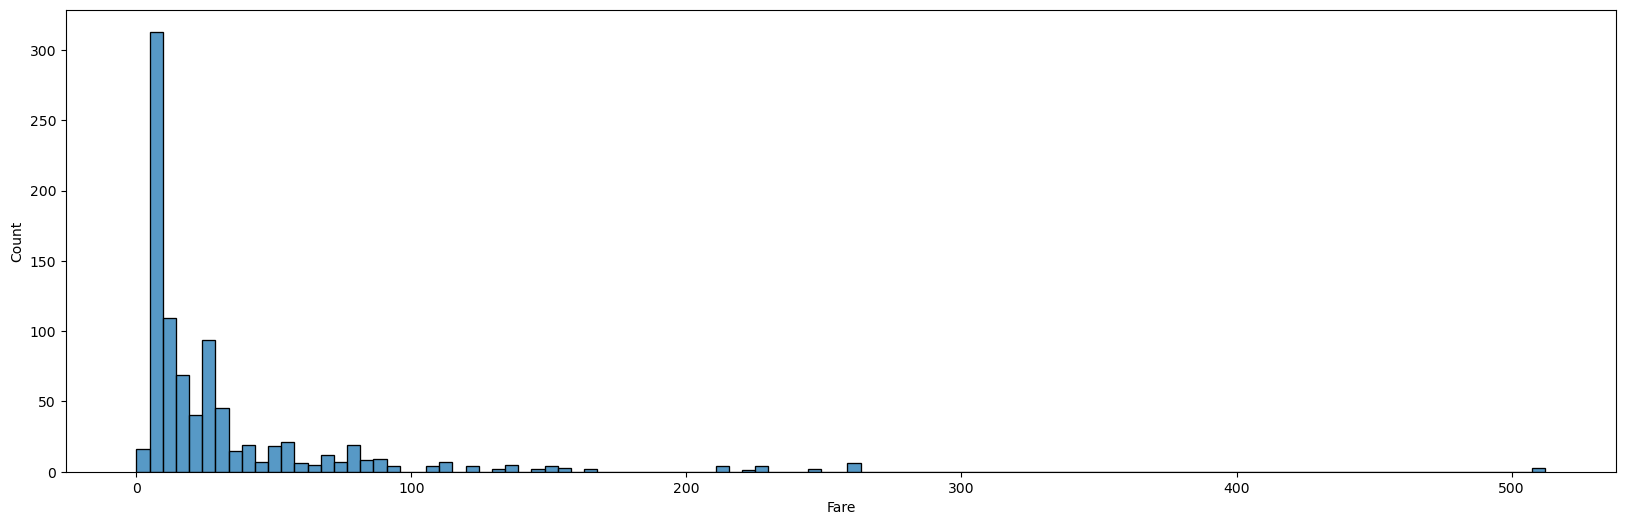

In [23]:
plt.figure(figsize=(20,6))
sns.histplot(clean_data['Fare'])

In [25]:
clean_data.to_csv('clean_data')